# Packages

In [1]:
using Pkg; Pkg.activate("."); 
using TSO
using PyPlot

  Activating environment at `/cobra/u/peitner/Turbospectrum/opacity_tables/TSO.jl/examples/converting_tables/Project.toml`


# TurboS table for comparison

In [2]:
eosTSO       = reload(TSO.SqEoS, "../../../tests/TSO_sun_Magg_v10.2/eos.hdf5")
opacitiesTSO = reload(TSO.SqOpacity, "../../../tests/TSO_sun_Magg_v10.2/binned_opacities.hdf5");

# Read the AESOPUS tables for comparison

In [3]:
pathE = "EOS_OPACITY_MPIA/ener_z0.0165_x0.7351_MBS22_n1458.tab"
pathK = "EOS_OPACITY_MPIA/kross_z0.0165_x0.7351_MBS22_n1458.tab"
pathN = "EOS_OPACITY_MPIA/nelec_z0.0165_x0.7351_MBS22_n1458.tab"
pathP = "EOS_OPACITY_MPIA/pgas_z0.0165_x0.7351_MBS22_n1458.tab"
pathS = "EOS_OPACITY_MPIA/sigma_z0.0165_x0.7351_MBS22_n5365.tab";

In [4]:
eosAESO = AesopusEoS(energy=pathE, kross=pathK, pg=pathP, ne=pathN)
opaAESO = AesopusOpacity(eosAESO, sigma=pathS)
eosAESO_e, opaAESO_e = unify(eosAESO, opaAESO);

size(eos.lnT) = (185, 201)


┌ Info: EoS passed that seems to be on the correct (lnT) grid. Puffing up...
└ @ TSO /cobra/u/peitner/Turbospectrum/opacity_tables/TSO.jl/src/_eos.jl:485


# Compare the EoS

In [5]:
get_closest(a, b) = argmin(abs.(a .- b)) 

get_closest (generic function with 1 method)

In [6]:
rho_test = 1e-8
iTSO  = get_closest(eosTSO.lnRho,  log(rho_test))
iAESO = get_closest(eosAESO.lnRho, log(rho_test));

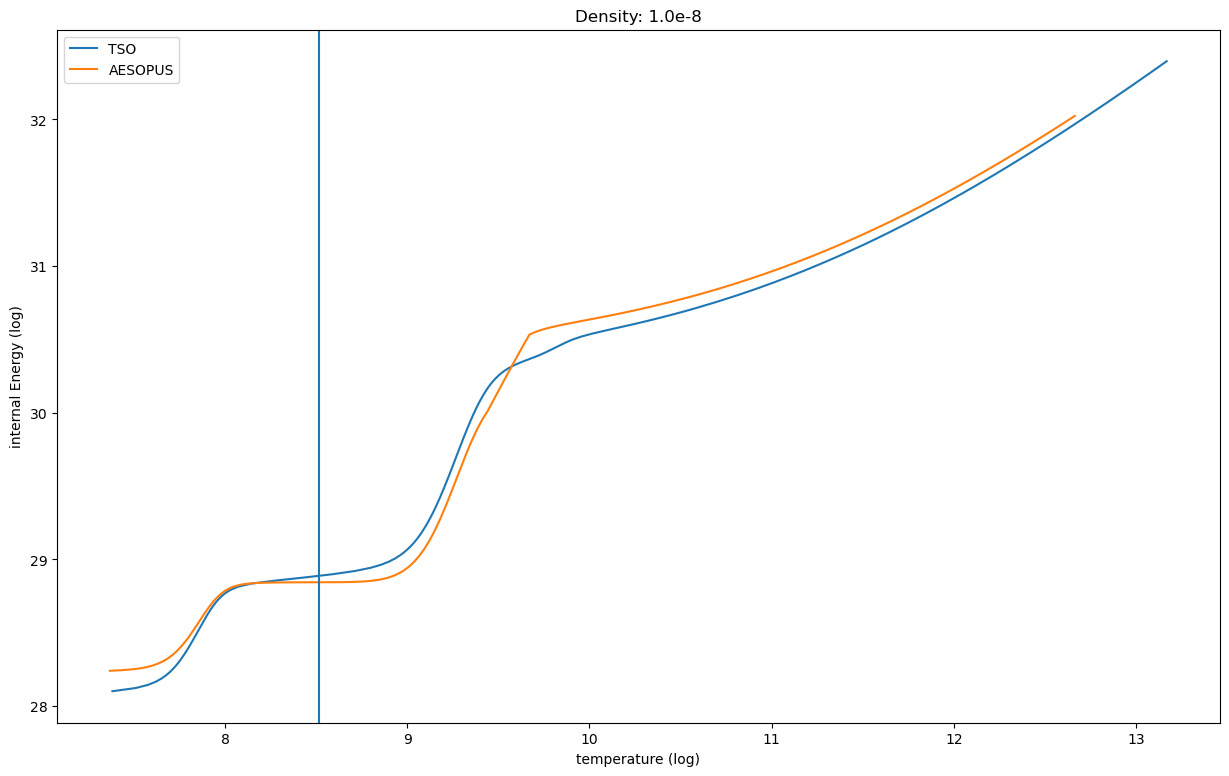

In [7]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnEi, label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnEi[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("internal Energy (log)")
ax.set_xlabel("temperature (log)")

ax.axvline(log(5000))

ax.legend()

gcf()

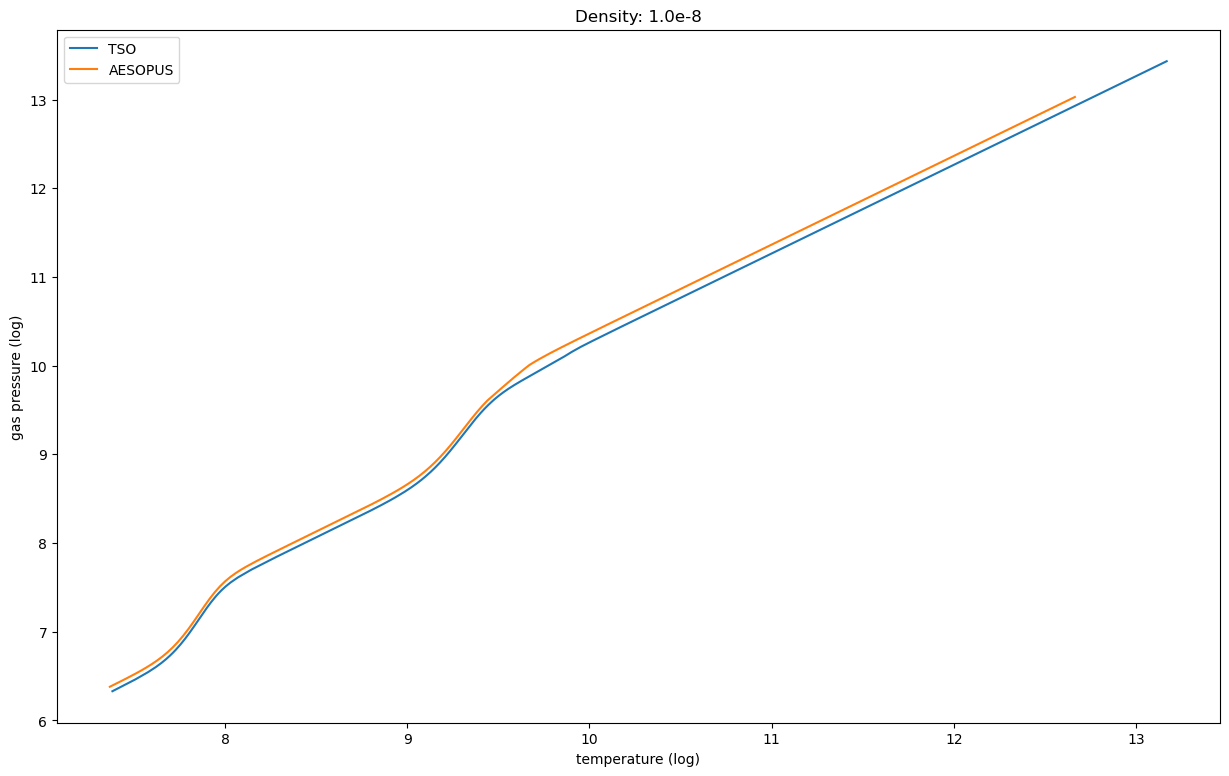

In [8]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnPg[:, iTSO], label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnPg[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("gas pressure (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

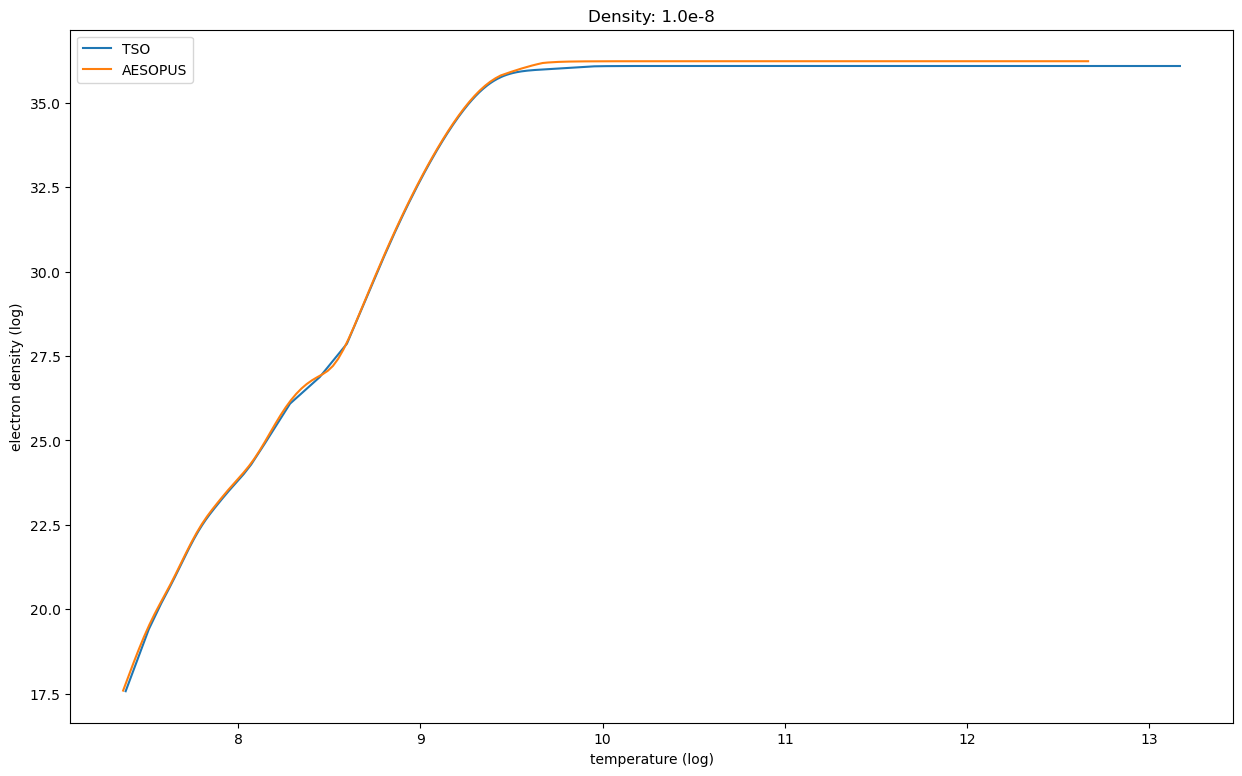

In [9]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnNe[:, iTSO], label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnNe[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("electron density (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

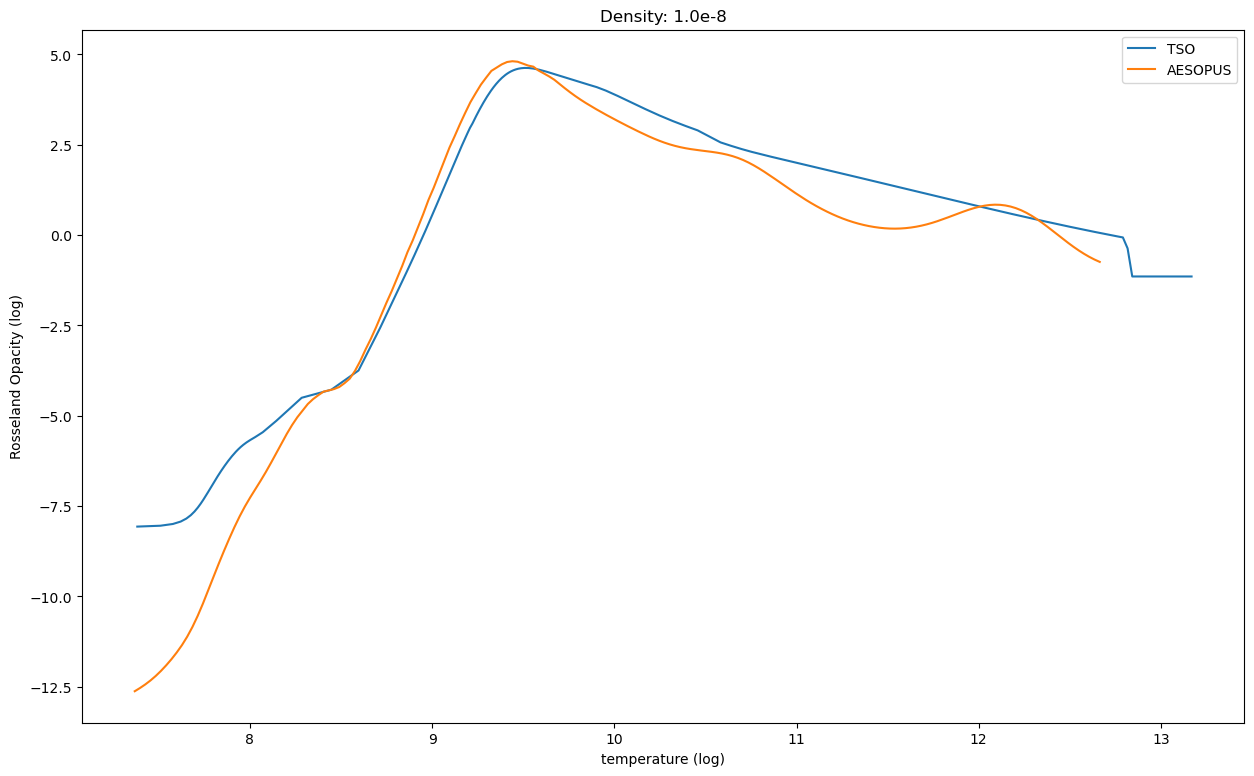

In [10]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnRoss[:, iTSO], label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnRoss[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("Rosseland Opacity (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

# Compare the Opacities

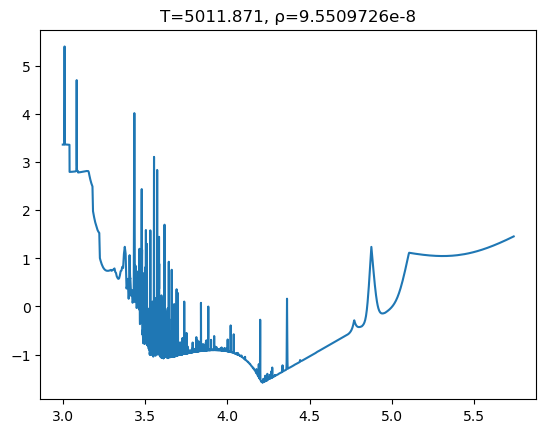

In [11]:
ir = get_closest(eosAESO.lnRho, log(1e-7))
it = get_closest(eosAESO.lnT,   log(5000.))


close()

## Title
plt.title("T=$(exp(eosAESO.lnT[it])), ρ=$(exp(eosAESO.lnRho[ir]))")

## plot
plt.plot(log10.(opaAESO.λ), log10.(opaAESO.κ[it, ir, :]))

gcf()

# Interpolated E-Tables

In [12]:
rho_test = 1e-8
iAESO    = get_closest(eosAESO.lnRho,   log(rho_test));
iAESO_e  = get_closest(eosAESO_e.lnRho, log(rho_test));

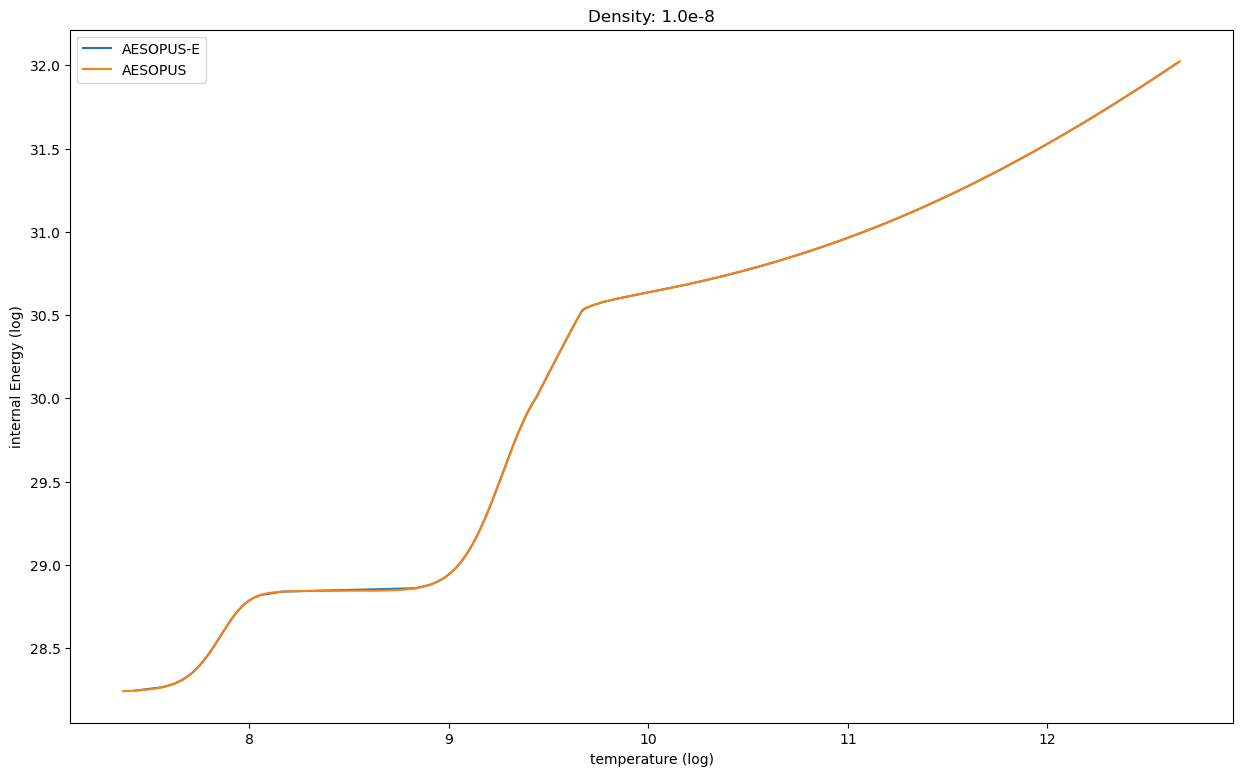

In [13]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosAESO_e.lnT[:, iAESO_e], eosAESO_e.lnEi, label="AESOPUS-E")
ax.plot(eosAESO.lnT, eosAESO.lnEi[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("internal Energy (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

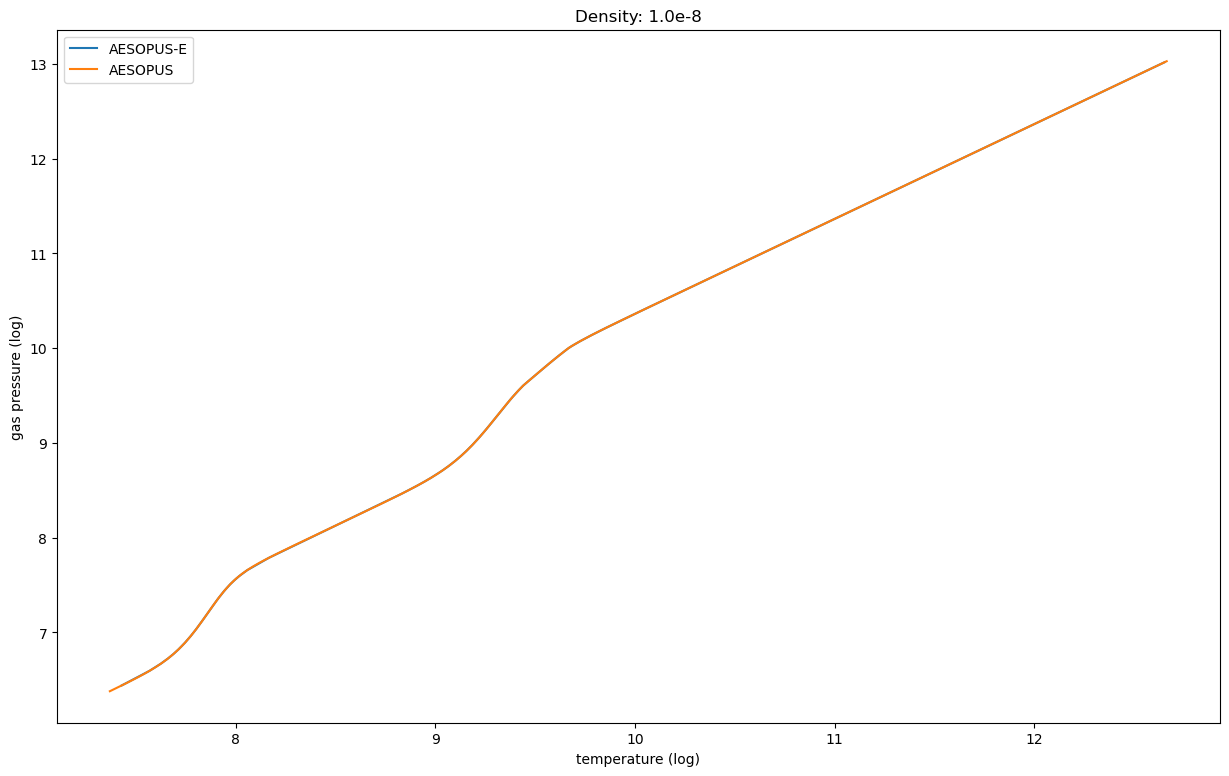

In [14]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosAESO_e.lnT[:, iAESO_e], eosAESO_e.lnPg[:, iAESO_e], label="AESOPUS-E")
ax.plot(eosAESO.lnT, eosAESO.lnPg[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("gas pressure (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

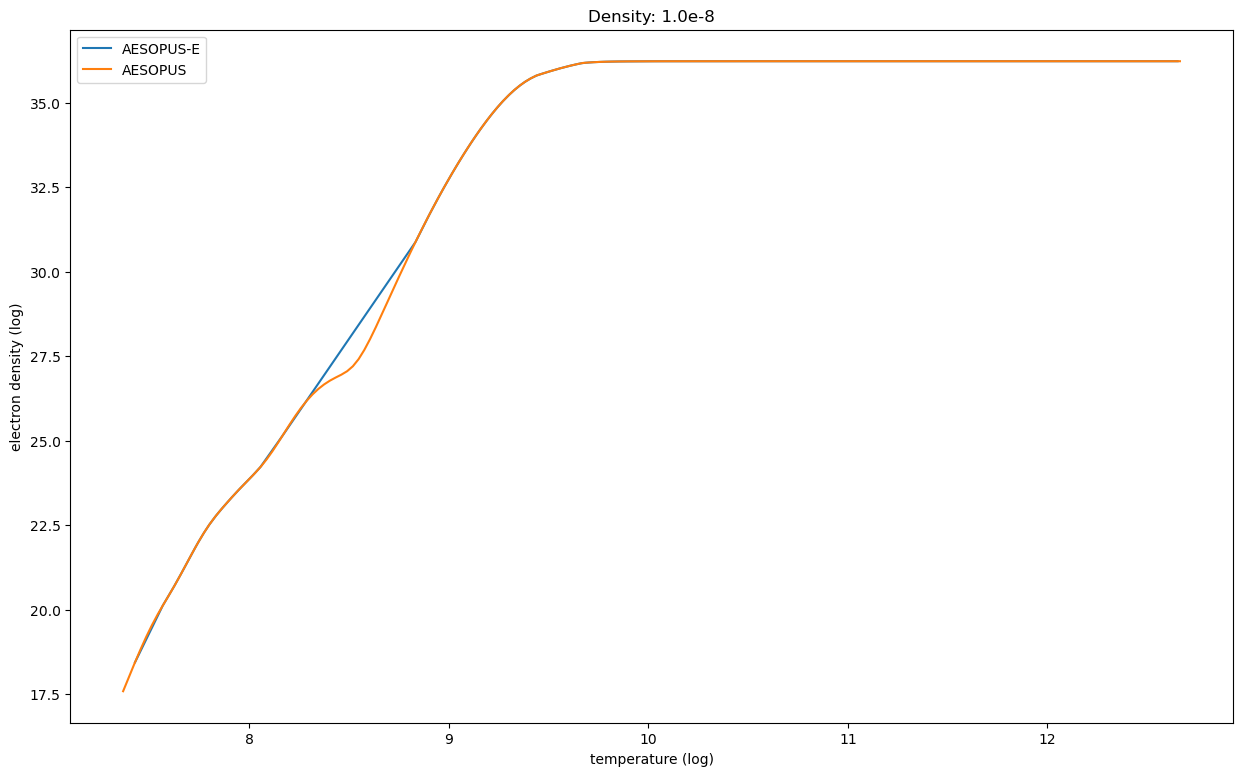

In [15]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosAESO_e.lnT[:, iAESO_e], eosAESO_e.lnNe[:, iAESO_e], label="AESOPUS-E")
ax.plot(eosAESO.lnT, eosAESO.lnNe[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("electron density (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

## Opacities

┌ Info: T=5011.871, ρ=9.5509726e-8
└ @ Main /u/peitner/Turbospectrum/opacity_tables/TSO.jl/examples/converting_tables/aesopus.ipynb:14
┌ Info: T=4118.0317, ρ=9.5509726e-8
└ @ Main /u/peitner/Turbospectrum/opacity_tables/TSO.jl/examples/converting_tables/aesopus.ipynb:15


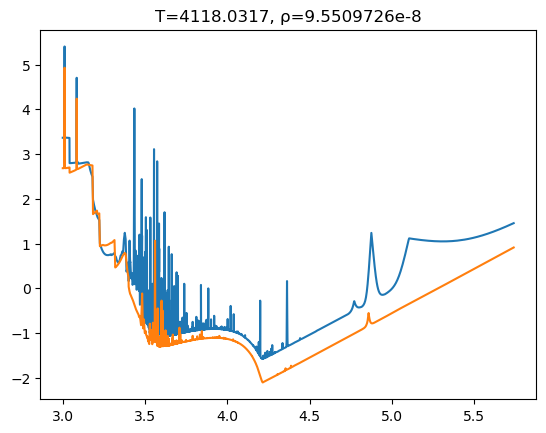

In [16]:
ir = get_closest(eosAESO.lnRho, log(1e-7))
it = get_closest(eosAESO.lnT,   log(5000.))

ir_e = get_closest(eosAESO_e.lnRho, log(1e-7))
it_e = get_closest(eosAESO_e.lnT[:, ir_e], log(5000.))


close()

## Title
plt.title("T=$(exp(eosAESO.lnT[it])), ρ=$(exp(eosAESO.lnRho[ir]))")
plt.title("T=$(exp(eosAESO_e.lnT[it_e, ir_e])), ρ=$(exp(eosAESO_e.lnRho[ir_e]))")

@info "T=$(exp(eosAESO.lnT[it])), ρ=$(exp(eosAESO.lnRho[ir]))"
@info "T=$(exp(eosAESO_e.lnT[it_e, ir_e])), ρ=$(exp(eosAESO_e.lnRho[ir_e]))"


## plot
plt.plot(log10.(opaAESO.λ), log10.(opaAESO.κ[it, ir, :]))
plt.plot(log10.(opaAESO_e.λ), log10.(opaAESO_e.κ[it_e, ir_e, :]))


gcf()

# Trouble with EoS
The AESOPUS EoS seems to be non-monotonic for a unknown reason. This causes problems when interpolating it to a internal energy grid. It also would cause problems in using it in the MHD equations, because at a given internal energy you would have 2 corresponding temperatures. To avoid this one may swith the grid the opacities are tabulated on from one EoS to another. For this we ``complement`` the opacities with a new EoS.

In [17]:
eos_new = eosTSO
opa_regrid = complement(opaAESO, eosAESO, eos_new);

┌ Info: ("Old Grid:", :lnT)
└ @ TSO /cobra/u/peitner/Turbospectrum/opacity_tables/TSO.jl/src/_aesopus.jl:237
┌ Info: ("New Grid:", :lnEi)
└ @ TSO /cobra/u/peitner/Turbospectrum/opacity_tables/TSO.jl/src/_aesopus.jl:238


┌ Info: T=5011.871, ρ=9.5509726e-8
└ @ Main /u/peitner/Turbospectrum/opacity_tables/TSO.jl/examples/converting_tables/aesopus.ipynb:14
┌ Info: T=4711.249, ρ=1.04736976e-7
└ @ Main /u/peitner/Turbospectrum/opacity_tables/TSO.jl/examples/converting_tables/aesopus.ipynb:15


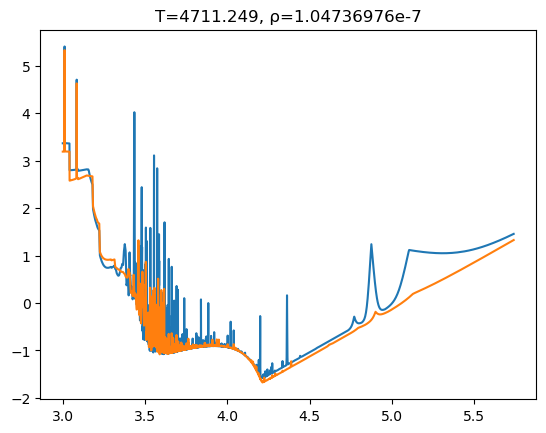

In [20]:
ir = get_closest(eosAESO.lnRho, log(1e-7))
it = get_closest(eosAESO.lnT,   log(5000.))

ir_e = get_closest(eos_new.lnRho, log(1e-7))
it_e = get_closest(eos_new.lnT[:, ir_e], log(5000.))


close()

## Title
plt.title("T=$(exp(eosAESO.lnT[it])), ρ=$(exp(eosAESO.lnRho[ir]))")
plt.title("T=$(exp(eos_new.lnT[it_e, ir_e])), ρ=$(exp(eos_new.lnRho[ir_e]))")

@info "T=$(exp(eosAESO.lnT[it])), ρ=$(exp(eosAESO.lnRho[ir]))"
@info "T=$(exp(eos_new.lnT[it_e, ir_e])), ρ=$(exp(eos_new.lnRho[ir_e]))"


## plot
plt.plot(log10.(opaAESO.λ), log10.(opaAESO.κ[it, ir, :]))
plt.plot(log10.(opa_regrid.λ), log10.(opa_regrid.κ[it_e, ir_e, :]))


gcf()